# Red Wine Quality Prediction

# Import modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [8]:
df=pd.read_csv('D:/vac_folder/winequality_red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfer dioxide
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,3.367296
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,3.496508
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,3.688879
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,3.496508
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,2.944439


In [43]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfer dioxide
1040,7.4,0.965,0.00,2.2,0.088,16.0,32.0,0.99756,3.58,0.67,10.2,5,2.833213
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6,3.610918
173,7.4,0.620,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.5,6,3.218876
761,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5,1.791759
547,10.6,0.310,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6,1.945910


In [9]:
#statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
#checking duplicate records
df.shape

(1599, 13)

In [32]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfer dioxide
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.484907
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,2.890372
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,2.397895
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,2.564949
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,2.564949
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,2.564949
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,2.564949
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,3.218876


In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(1359, 13)

In [35]:
1599-1359

240

In [36]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfer dioxide


DataFrame has 240 duplicate records in the data.We will remove this from the dataset so that we get only distinct records.

# Preprocessing the dataset

In [11]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

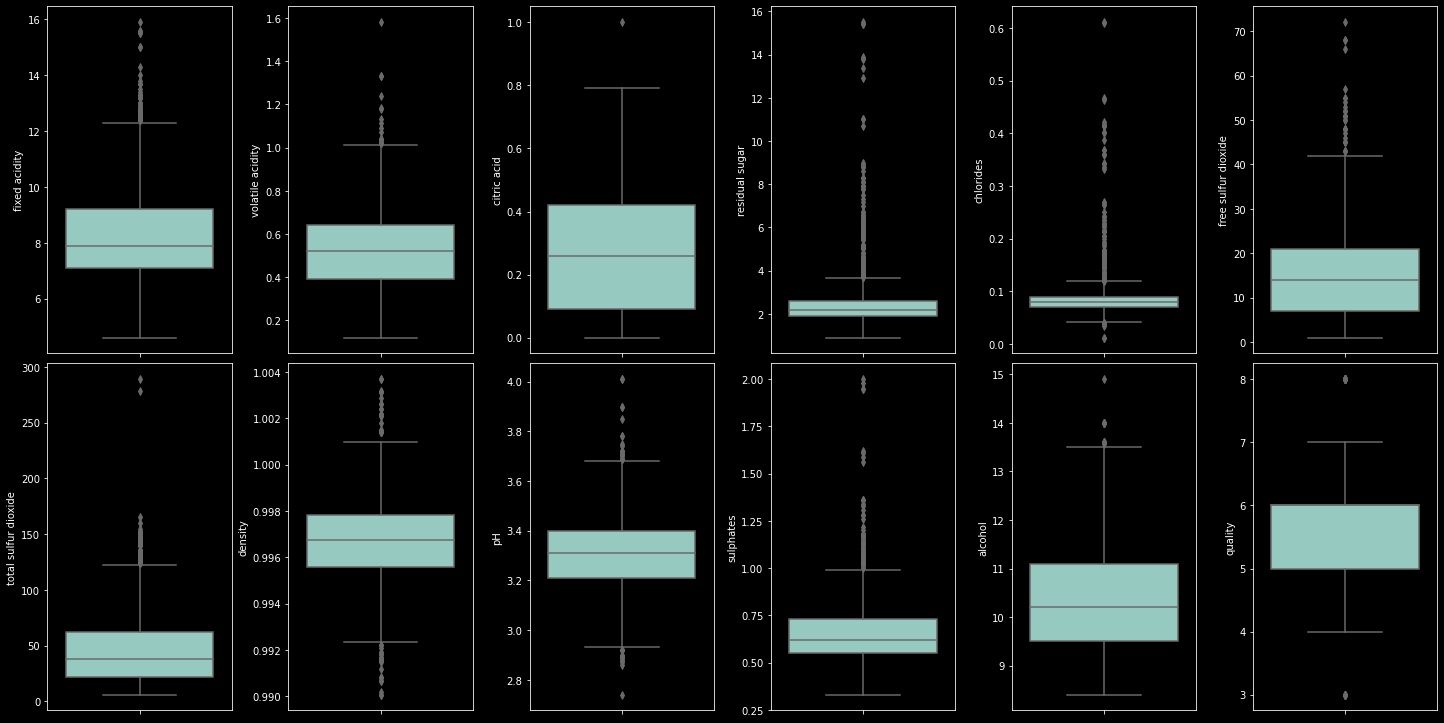

In [12]:
#create box plot
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax =ax.flatten()
for col,value in df.items():
    if col != 'type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=0.5)

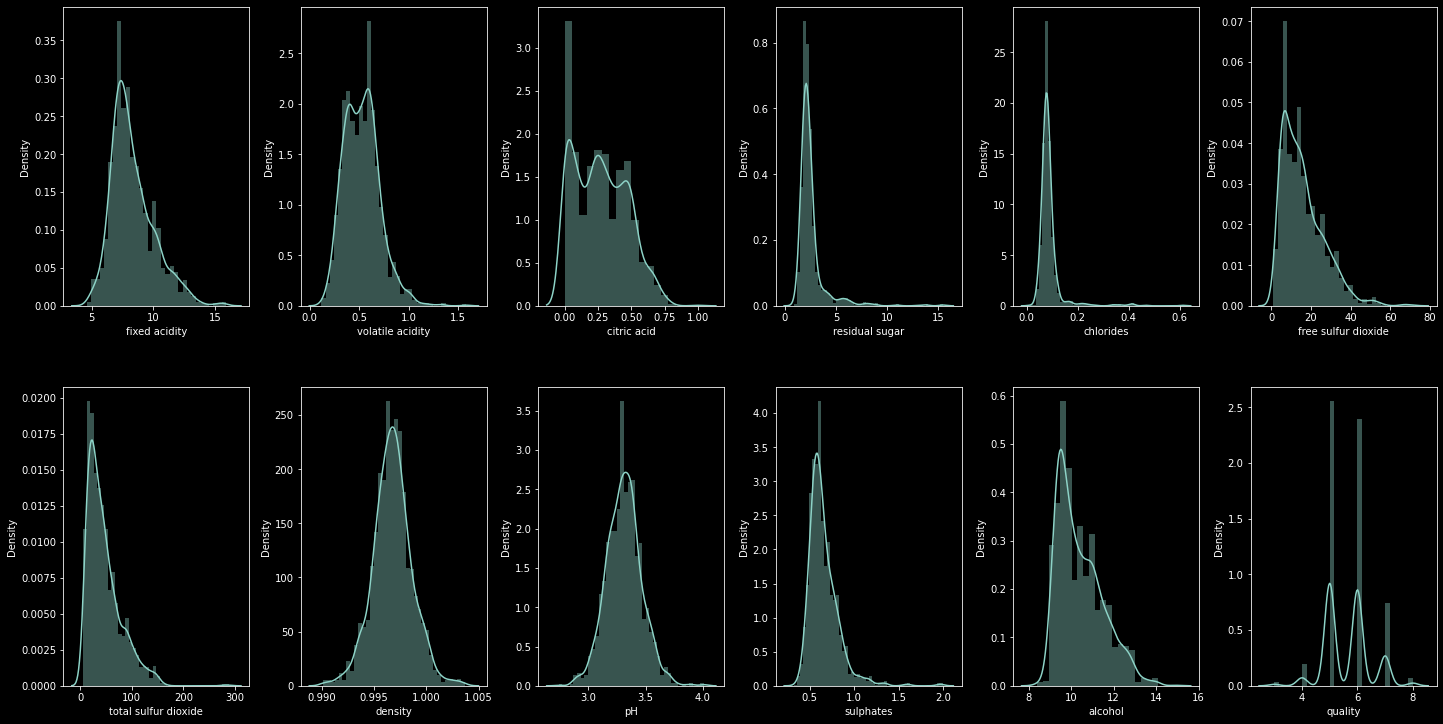

In [13]:
#create dist plot
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index =0 
ax = ax.flatten()
for col, value in df.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [14]:
#log transformation
df['free sulfer dioxide']=np.log(1+df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfer dioxide', ylabel='Density'>

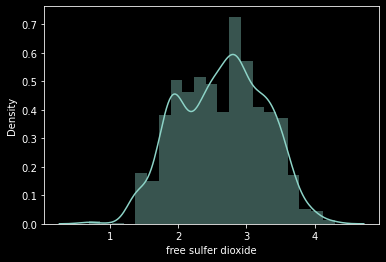

In [15]:
sns.distplot(df['free sulfer dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

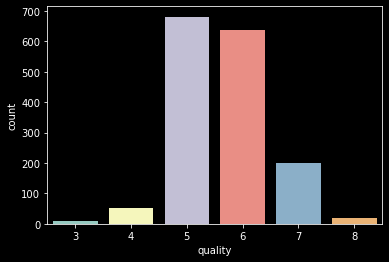

In [16]:
sns.countplot(df['quality'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

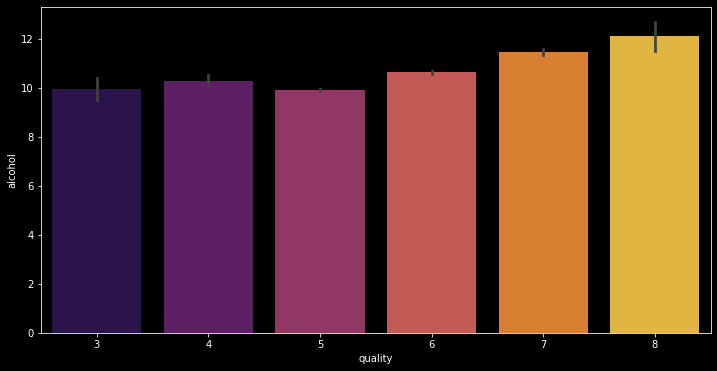

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='alcohol',data=df,palette='inferno')

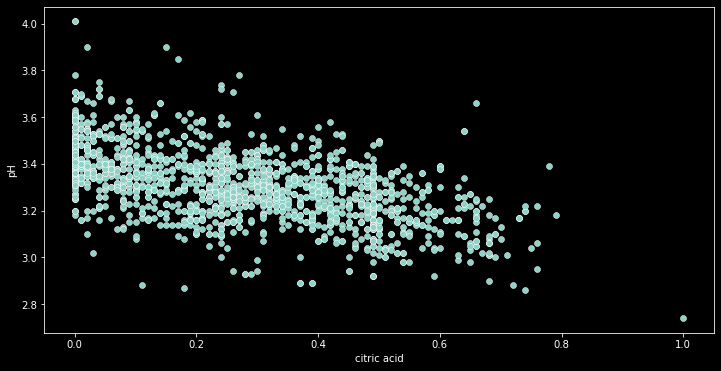

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='citric acid',y='pH',data=df)
plt.show()

<Figure size 864x432 with 0 Axes>

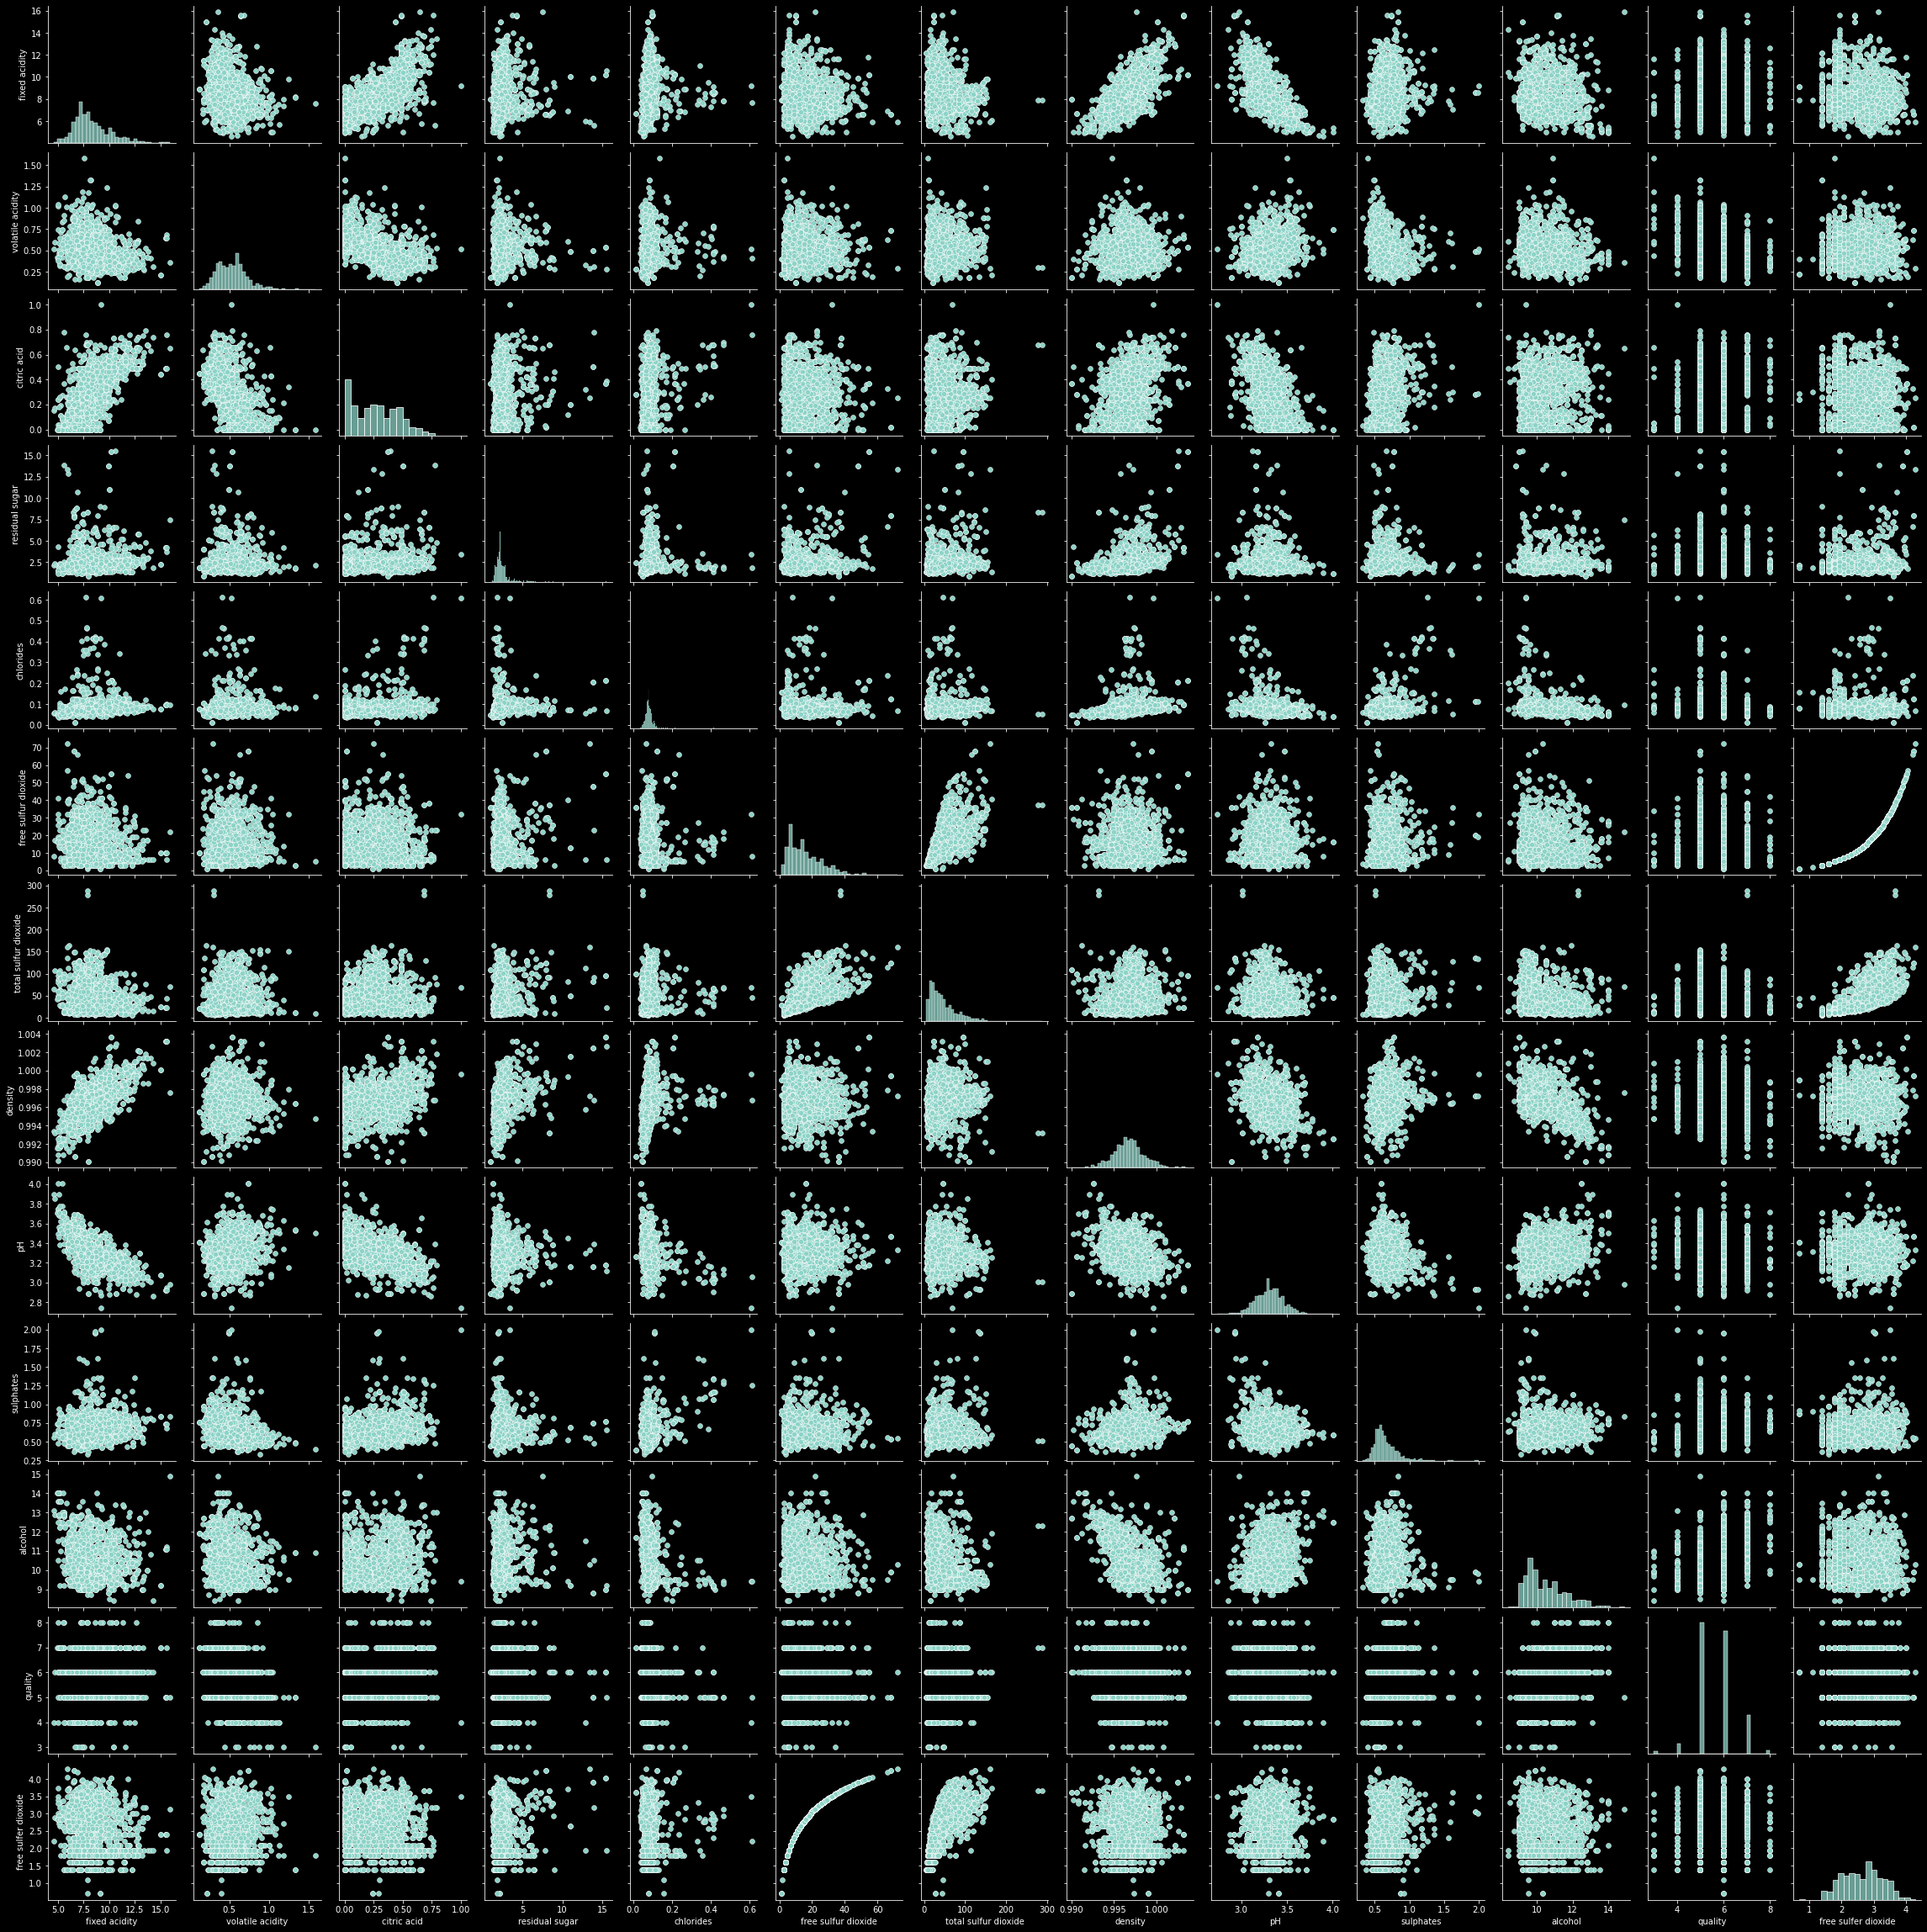

In [19]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

# correlation matrix

<AxesSubplot:>

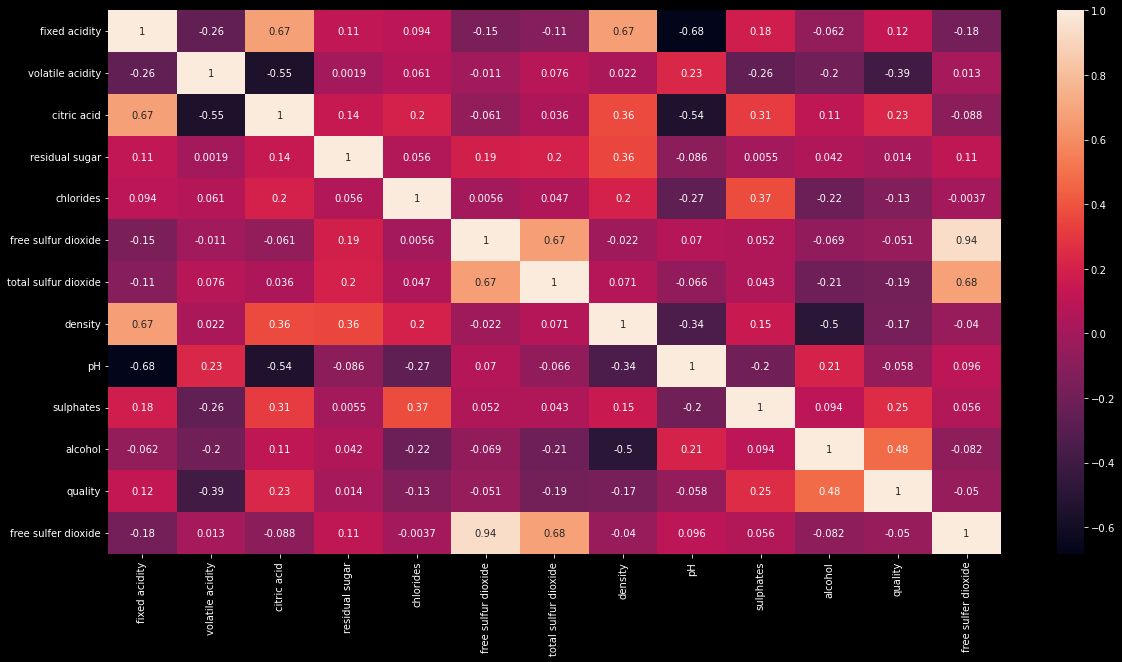

In [20]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

# Class Imbalancement

In [21]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\my\anaconda3\lib\site-packages (0.10.1)



In [22]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [23]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

SMOTE - Synthetic Minority Oversampling Technique

In this technique, the minority class is over-sampled by producing synthetic examples rather than by over-sampling with 
replacement and for each minority class observation

In [24]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x,y=os.fit_resample(x,y)

In [25]:
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

# Model Training

In [26]:
#classify funtion
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)
    # train the model
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test,y_test)*100)
    #cross-validation
    score=cross_val_score(model,x,y,cv=5)
    print("CV score:",np.mean(score)*100)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy: 52.054794520547944
CV score: 48.84998787980356


# Decision Tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 78.27788649706457
CV score: 73.1036082273689


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model,x,y)

Accuracy: 84.34442270058709
CV score: 80.9590816183006


In [40]:
lr=52.05
drc=78.27
rfc=84.34

# Best Model

In [41]:
print("Logistic Regression",lr)
print("Decision Tree classifier",drc)
print("Random Forest Classifier",rfc)

Logistic Regression 52.05
Decision Tree classifier 78.27
Random Forest Classifier 84.34


 We can conclude that the Random Forest Classifier model performed the best with an accuracy of 84.34%